#Single

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Machine-Learning-2023/main/height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


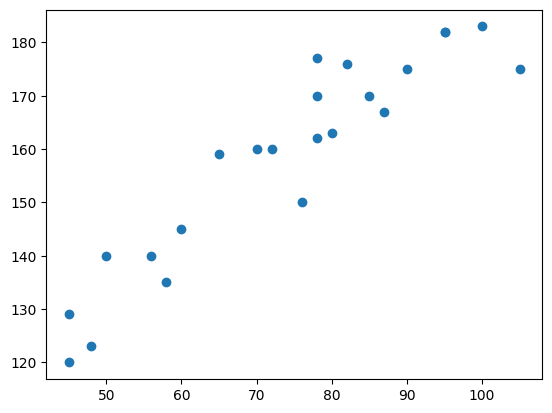

In [4]:
plt.scatter(df["Weight"],df["Height"])

<Axes: >

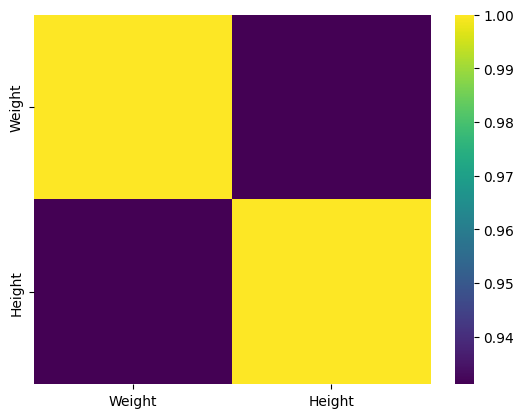

In [5]:
sns.heatmap(df.corr(),cmap="viridis")

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


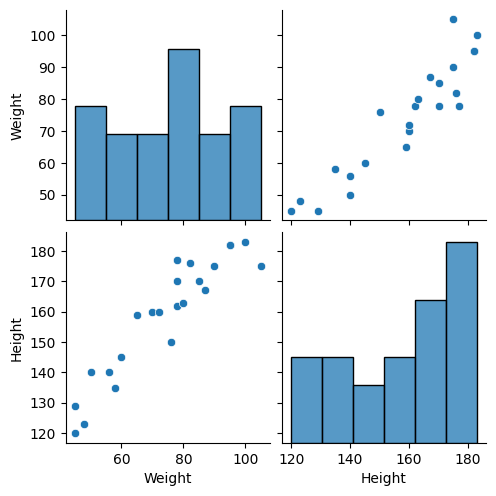

In [7]:
sns.pairplot(df)

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)


<ipython-input-13-2c8adc7cba18>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test)


<Axes: ylabel='Density'>

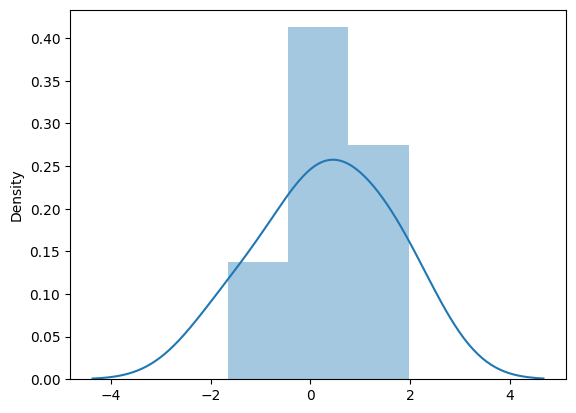

In [13]:
sns.distplot(X_test)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_labels=model.predict(X_test)

In [18]:
model.coef_

array([17.2982057])

In [19]:
model.intercept_

156.47058823529412

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
mse=mean_squared_error(y_test,y_labels)
mae=mean_absolute_error(y_test,y_labels)
rmse=np.sqrt(mse)

In [22]:
print(mse,mae,rmse)

114.84069295228699 9.66512588679501 10.716374991212605


In [23]:
from sklearn.metrics import r2_score

In [24]:
scoere=r2_score(y_test,y_labels)

In [25]:
print(scoere)

0.7360826717981276


In [26]:
model.predict(scale.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

#Multiple

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Machine-Learning-2023/main/economic_index.csv")

In [29]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [30]:
df.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)

In [31]:
len(df)

24

In [32]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

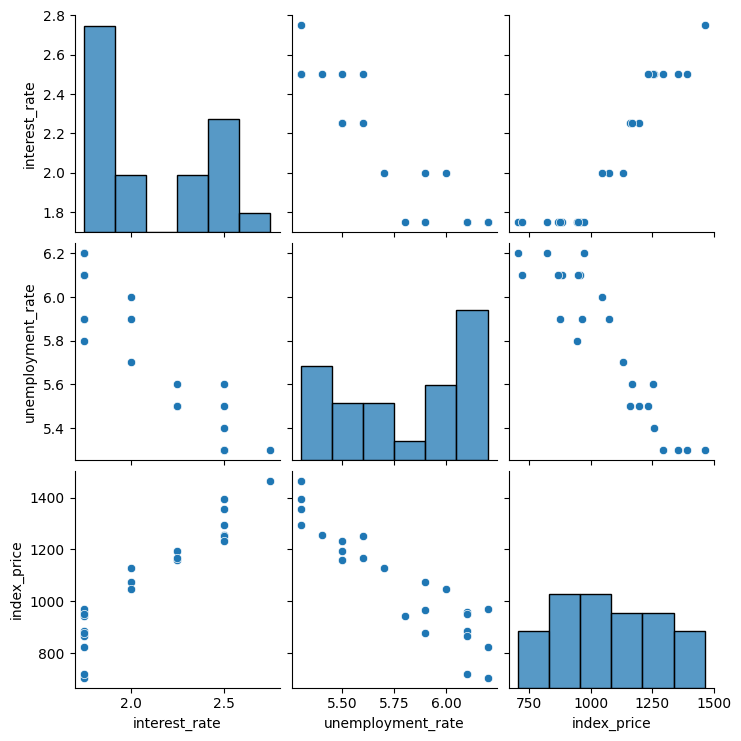

In [33]:
sns.pairplot(df)

In [34]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [35]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [38]:
y_test.shape

(6,)

<Axes: xlabel='interest_rate', ylabel='index_price'>

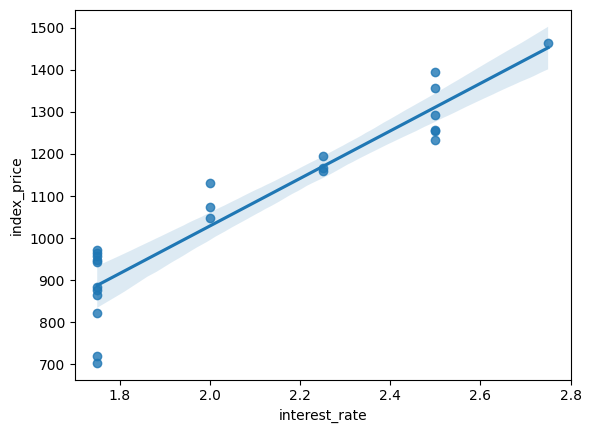

In [39]:
sns.regplot(x=df["interest_rate"],y=df["index_price"])

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scale=StandardScaler()

In [42]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
reg=LinearRegression()

In [56]:
reg.fit(X_train,y_train)

LinearRegression()

In [66]:
from sklearn.model_selection import cross_val_score

In [68]:
score=cross_val_score(reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
print(score)

[-1861.74046551 -8715.8459466  -7707.52362191 -9169.13776461
  -791.32842311]


In [57]:
y_pred=reg.predict(X_test)

In [58]:
res=y_test-y_pred

<ipython-input-59-4fe8f7297e5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: xlabel='index_price', ylabel='Density'>

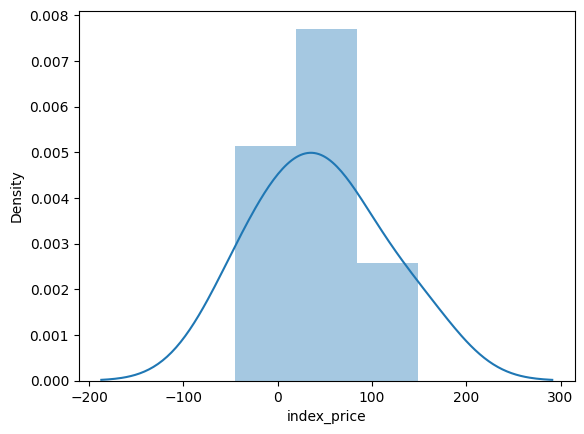

In [59]:
sns.distplot(res)

In [60]:
import statsmodels.api as ap

In [61]:
model=ap.OLS(y_train,X_train).fit()

In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 25 Jan 2024   Prob (F-statistic):                       0.754
Time:                        12:10:15   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
reg.intercept_

1053.4444444444443

In [64]:
reg.coef_

array([  88.27275507, -116.25716066])